<a href="https://colab.research.google.com/github/lee-saint/Pixir/blob/master/coco_korean_stage1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%tensorflow_version 2.x
import tensorflow as tf
import numpy as np

TensorFlow 2.x selected.


In [0]:
import sys
sys.path.append('drive/My Drive/Colab Notebooks/pixir/StackGAN')
from stage1_wgangp import load_coco_dataset, Stage1WGANGP

In [0]:
data_path = 'drive/My Drive/Colab Notebooks/pixir/data/coco_korean/'
result_path = 'drive/My Drive/Colab Notebooks/pixir/StackGAN/result_wgan_gp/'
model_path = 'drive/My Drive/Colab Notebooks/pixir/StackGAN/models/'
embedding_dim = 768
image_size = 64
batch_size = 128
gen_lr = 0.00005
disc_lr = 0.00005
gp_weight = 10
kl_weight = 1
disc_train_n = 5
epochs = 1000

In [0]:
images, embeddings = load_coco_dataset(data_path)
print(images.shape)
print(embeddings.shape)
images_normalized = images[:20000] / 127.5 - 1
dataset = tf.data.Dataset.from_tensor_slices((images_normalized, embeddings[:20000]))
dataset = dataset.shuffle(buffer_size=20000)
dataset = dataset.batch(batch_size)

(123287, 64, 64, 3)
(123287, 768)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 63.5, 63.5, -0.5)

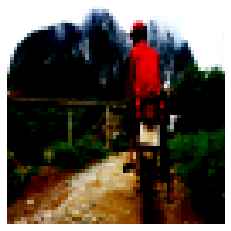

In [0]:
import matplotlib.pyplot as plt

plt.imshow(images_normalized[0])
plt.axis('off')

In [0]:
stage1_wgan_gp = Stage1WGANGP(embedding_dim, image_size, gen_lr, disc_lr, gp_weight, kl_weight, disc_train_n)
stage1_wgan_gp.generator.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 768)]        0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 256)          196864      input_1[0][0]                    
__________________________________________________________________________________________________
leaky_re_lu (LeakyReLU)         (None, 256)          0           dense[0][0]                      
__________________________________________________________________________________________________
lambda (Lambda)                 (None, 128)          0           leaky_re_lu[0][0]                
______________________________________________________________________________________________

In [0]:
stage1_wgan_gp.discriminator.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 64, 64, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_5 (Conv2D)               (None, 32, 32, 128)  6144        input_3[0][0]                    
__________________________________________________________________________________________________
leaky_re_lu_1 (LeakyReLU)       (None, 32, 32, 128)  0           conv2d_5[0][0]                   
__________________________________________________________________________________________________
dropout (Dropout)               (None, 32, 32, 128)  0           leaky_re_lu_1[0][0]              
____________________________________________________________________________________________

In [0]:
seed_idx = np.random.choice(embeddings.shape[0] - 20000, 16)
seed_idx += 20000
seeds = embeddings[seed_idx]
print(seeds.shape)
stage1_wgan_gp.set_seeds(seeds, (4, 4), result_path)
print(stage1_wgan_gp.seeds.shape)
print(stage1_wgan_gp.plot_dim)

(16, 768)
(16, 768)
(4, 4)


In [0]:
stage1_wgan_gp.generator.load_weights(model_path + 'stage1_generator_epoch250.h5')
stage1_wgan_gp.discriminator.load_weights(model_path + 'stage1_discriminator_epoch250.h5')

In [0]:
stage1_wgan_gp.train(dataset, epochs, model_path)

Time for epoch 35 is 281.48171854019165 sec.
Time for epoch 36 is 279.57209038734436 sec.
Time for epoch 37 is 279.64321398735046 sec.
Time for epoch 38 is 279.84571409225464 sec.
Time for epoch 39 is 279.6947808265686 sec.
Time for epoch 40 is 288.39636516571045 sec.
Time for epoch 41 is 279.61836218833923 sec.
Time for epoch 42 is 279.46497988700867 sec.
Time for epoch 43 is 279.53844809532166 sec.
Time for epoch 44 is 280.293288230896 sec.
Time for epoch 45 is 279.7716751098633 sec.
Time for epoch 46 is 279.6695787906647 sec.
Time for epoch 47 is 279.6208417415619 sec.
Time for epoch 48 is 279.60219526290894 sec.
Time for epoch 49 is 279.64154410362244 sec.
Time for epoch 50 is 296.9000871181488 sec.


KeyboardInterrupt: ignored